In [1]:
from google.colab import drive 
drive.mount ("content/")

Mounted at content/


In [2]:
!pip install fastai

In [3]:
from fastai.vision import *

In [4]:
import torch

In [5]:
!pip install git+https://github.com/sean-mcclure/tetryon_ai.git

  Cloning https://github.com/sean-mcclure/tetryon_ai.git to /tmp/pip-req-build-eo5aexgm
  Running command git clone -q https://github.com/sean-mcclure/tetryon_ai.git /tmp/pip-req-build-eo5aexgm
  Created wheel for tetryonai: filename=tetryonai-0.1-py3-none-any.whl size=124681 sha256=842266baff748a357bd3a8dc0cbf87466b38b13fdb84e81c191067ce250b58ef
  Stored in directory: /tmp/pip-ephem-wheel-cache-1amojd0o/wheels/6e/09/32/8280334024f8c097e3d94a363210afcef97f631dcc9723dc4c
Successfully built tetryonai


In [6]:
from tetryonai.main import *

In [8]:
from google.colab import files
uploaded = files.upload()

Saving image_labels.csv to image_labels (1).csv


In [9]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['image_labels.csv']))# Dataset is now stored in a Pandas Dataframe

In [10]:
print (df2)

                  name            label
0     extract_1180.png              NOT
1       extract_36.png              NOT
2     extract_1345.png            short
3       extract_40.png            short
4      extract_580.png            short
...                ...              ...
1359   extract_217.png            short
1360  extract_1007.png             spur
1361   extract_212.png  spurious copper
1362    extract_85.png  spurious copper
1363   extract_307.png            short

[1364 rows x 2 columns]


In [11]:
image_labels_frame = csv_to_dataframe(**{
    "path_to_csv" : "image_labels.csv"
})

In [12]:
get_feature_counts

<function tetryonai.main.get_feature_counts>

In [151]:
df2.label

0                   NOT
1                   NOT
2                 short
3                 short
4                 short
             ...       
1359              short
1360               spur
1361    spurious copper
1362    spurious copper
1363              short
Name: label, Length: 1364, dtype: object

In [13]:
labelled_counts = get_feature_counts(**{
    "data_frame" : image_labels_frame,
    "feature" : "label"
})

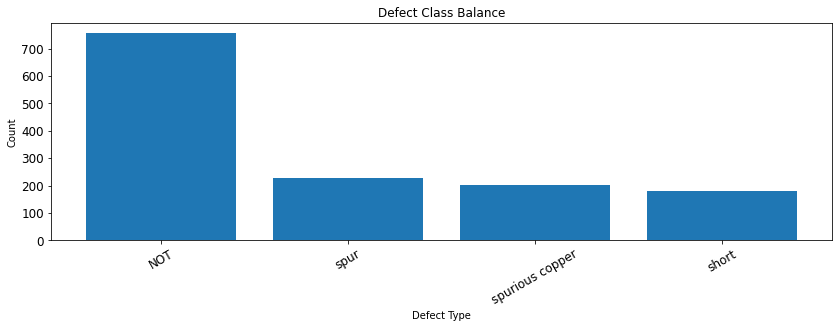

In [14]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 4
rcParams['text.color'] = "black"
rcParams['axes.labelcolor'] = "black"
rcParams['xtick.color'] = "black"
rcParams['ytick.color'] = "black"

index = np.arange(len(labelled_counts.keys()))
plt.bar(index, list(labelled_counts.values()))
plt.xlabel('Defect Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(index, labelled_counts.keys(), fontsize=5, rotation=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Defect Class Balance')
plt.show()

In [15]:
directory(**{
    "choice" : "make",
    "directory_path" : "training_csvs"
})

In [16]:
spur = []
short = []
spurious = []
not_defect = []
for index, row in image_labels_frame.iterrows():
  if(row[1] == 'spur'):
    spur.append(row[0])
  if(row[1] == 'short'):
    short.append(row[0])
  if(row[1] == 'spurious copper'):
    spurious.append(row[0])
  if(row[1] == 'NOT'):
    not_defect.append(row[0])

In [17]:
df_spur = pd.DataFrame(spur)
df_spur.to_csv("spur.csv", sep=',',index=False)

df_short = pd.DataFrame(short)
df_short.to_csv("short.csv", sep=',',index=False)

df_spurious = pd.DataFrame(spurious)
df_spurious.to_csv("spurious.csv", sep=',',index=False)

df_not_defect = pd.DataFrame(not_defect)
df_not_defect.to_csv("not_defect.csv", sep=',',index=False)

In [18]:
for folder in ['short', 'spur', 'spurious', 'not_defect']:
    directory(**{
        "choice" : "make",
        "directory_path" : "training_csvs/" + folder
    })

In [19]:
move_files(**{
    "file_paths" : ["short.csv", "spur.csv", "spurious.csv", "not_defect.csv"],
    "target_directory" : "training_csvs/"
})

In [21]:
!rm extracted_defects.zip

In [22]:
files.upload()

Saving extracted_defects.zip to extracted_defects.zip


{'extracted_defects.zip': b'PK\x03\x04\n\x00\x00\x00\x00\x003\x95\x8aS\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x15\x00\x1c\x00content/all_extracts/UT\t\x00\x03b\x9f\xb3ax\x9f\xb3aux\x0b\x00\x01\x04\x00\x00\x00\x00\x04\x00\x00\x00\x00PK\x03\x04\x14\x00\x00\x00\x08\x00\x11\x95\x8aS$\xe8\xe4\x1d\xb6\x03\x00\x00\xe3\x03\x00\x00%\x00\x1c\x00content/all_extracts/extract_1180.pngUT\t\x00\x03!\x9f\xb3a!\x9f\xb3aux\x0b\x00\x01\x04\x00\x00\x00\x00\x04\x00\x00\x00\x00%S\x7fLSW\x14\xee\x8f\x11(\x86\xb0\xbc\x990\xe6\xb6 \xdc\'\xd0LI\xec\x02$\xab\x91\xb9b\xdf}F\xd4\xcaC\xb6\t\x83et\xfe\xd16\xd0-\x0eR%\r\xa9$\x8c\xa8\xe5\xd9\x964\r\xc5\x04\xc4\xf1\xcc\x18\xa0y\xe3W\xaa\xd6.Mt\x8e\xb9\xc5\x8c\xa6\xb4MA&\xc4\xf5Aa\xb1]$s\xe7\xb9\xe4\xfeHN\xbe{\xbe\xef;\xe7\xdc\x9e\xe35\xda\x9c\xec\xb7\xb2%\x12I\x0e\xa64:\xb8\x9d\xb0\xf7f\xc9\xe0,\xf9\xd8\x07\xa7\x9c\xc3\x9a\x0fk\xdb\xa5\x89\xbb\xbd\xe6\xc5:Bs\xf7d\xc4\xfa\xefKK\xc6\xd7N|\xfc\xa3\x93\xb9\x9flvWT\xbe1\xe7\xa6\xfd\x9b\xd6K\xcb\x0b\xa9\x06\\\xff.\x

In [23]:
move_files(**{
    "file_paths" : ["extracted_defects.zip"],
    "target_directory" : "training_csvs"
})

In [24]:
import zipfile
with zipfile.ZipFile("training_csvs/extracted_defects.zip", 'r') as zip_ref:
    zip_ref.extractall("training_csvs/")

In [25]:
path = "training_csvs/"
path_to_extracts = "training_csvs/content/all_extracts/"

for index, row in df_spur.iterrows():    
    from_path = path_to_extracts + row[0]
    to_path = path + "/spur/" + row[0]
    move_files(**{
        "file_paths" : [from_path],
        "target_directory" : to_path
    })
    
for index, row in df_short.iterrows():    
    from_path = path_to_extracts + row[0]
    to_path = path + "/short/" + row[0]
    move_files(**{
        "file_paths" : [from_path],
        "target_directory" : to_path
    })
    
for index, row in df_spurious.iterrows():    
    from_path = path_to_extracts + row[0]
    to_path = path + "/spurious/" + row[0]
    move_files(**{
        "file_paths" : [from_path],
        "target_directory" : to_path
    })

for index, row in df_not_defect.iterrows():    
    from_path = path_to_extracts + row[0]
    to_path = path + "/not_defect/" + row[0]
    move_files(**{
        "file_paths" : [from_path],
        "target_directory" : to_path
    })



In [26]:
directory(**{
    "choice" : "remove",
    "directory_path" : "training_csvs/content",
    "force" : True
})

In [27]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4, bs=10).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  re

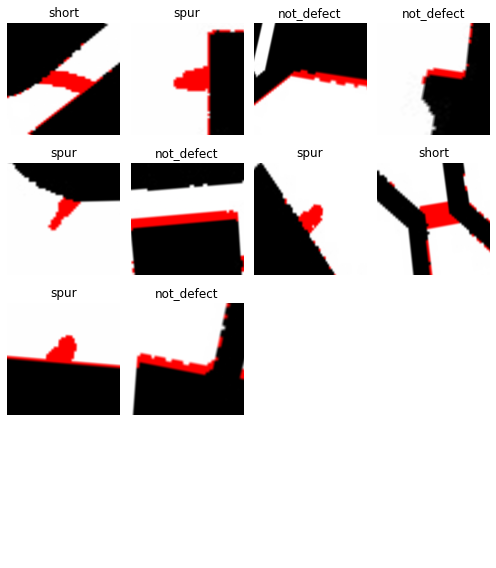

In [28]:
data.show_batch(rows=4, figsize=(7, 8))

In [29]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [30]:
defaults.device = torch.device('cuda')
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.194843,0.381346,0.128676,05:54
1,0.797817,0.385713,0.128676,06:00
2,0.620005,0.429790,0.102941,05:58
3,0.505092,0.403495,0.113971,05:56
4,0.438463,0.220826,0.073529,05:58
5,0.447250,0.207015,0.058824,05:56
6,0.332079,0.193025,0.055147,05:59
7,0.267928,0.160274,0.055147,05:56
8,0.261743,0.150566,0.047794,05:57
9,0.298161,0.182602,0.051471,05:57


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))




---



In [31]:
learn.unfreeze()

In [36]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


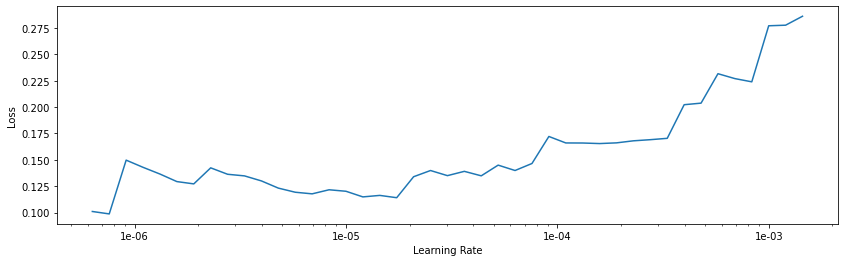

In [37]:
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(4, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.280460,0.102290,0.018382,08:44
1,0.321278,0.070513,0.022059,08:54
2,0.158741,0.055617,0.025735,08:56
3,0.142006,0.070334,0.029412,08:55


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [39]:
learn.save('defect_classifier')
learn.load('defect_classifier')
learn.export('defect_classifier.pkl')

In [ ]:

test_temps = {}
file_names = os.listdir('hold_out')

for index, file in enumerate(file_names):
  if "test" in file:
      test_temps[file_names[index]] = os.path.getsize('hold_out/' + file)
